<a href="https://colab.research.google.com/github/NNATuna/ML-DL/blob/main/CNN/Traffic_Signs_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import thư viện

In [ ]:
import tensorflow as tf
tf.__version__
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load data


In [ ]:
dataset_link = '/content/drive/MyDrive/ML/Traffic_Sign_Detection/dataset/'
train_link = dataset_link + 'train.p'
valid_link = dataset_link + 'valid.p'
test_link = dataset_link + 'test.p'

In [ ]:
import pickle
with open(train_link, mode='rb') as f:
    train = pickle.load(f)
with open(valid_link, mode='rb') as f:
    valid = pickle.load(f)
with open(test_link, mode='rb') as f:
    test = pickle.load(f)

In [ ]:
trainX, trainY = train['features'], train['labels']
validX, validY = valid['features'], valid['labels']
testX, testY = test['features'], test['labels']

In [ ]:
trainX.shape

(34799, 32, 32, 3)

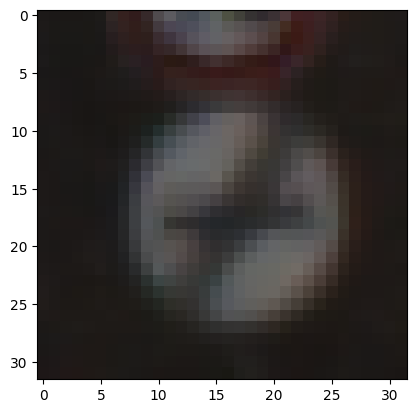

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(trainX[0])

In [ ]:
trainY[0]

np.uint8(41)

#Label Map

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[0]]

'End of no passing'

#Process data

'Priority road'

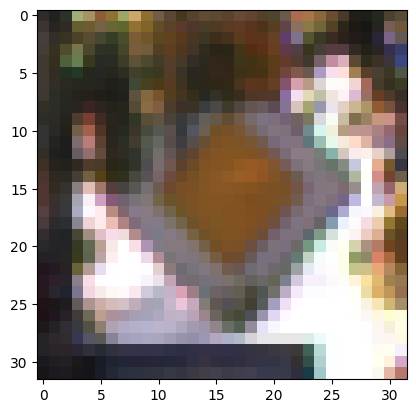

In [ ]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY)
plt.imshow(trainX[0])
classNames[trainY[0]]

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
trainY = label_binarizer.fit_transform(trainY)
validY = label_binarizer.fit_transform(validY)

#Pre training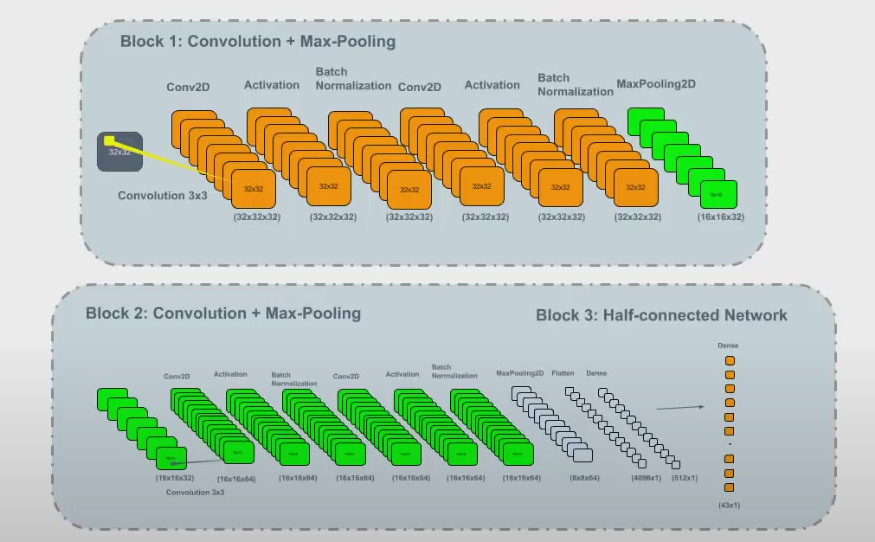

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
W, H = 32, 32
Classes =   43
shape = (W, H, 3)

In [ ]:
model.add(Conv2D(32, (3,3), padding='same', input_shape = shape))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3), padding='same'))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3), padding='same'))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3,3), padding='same'))

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(Classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        22,059 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10
#epochs
#step
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9, decay=learning_rate / epochs)

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print("Start training")
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0] // batch_size, epochs=epochs, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Start training
Epoch 1/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.2366 - loss: 2.9030 - val_accuracy: 0.4664 - val_loss: 1.7850
Epoch 2/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 26:53 3s/step - accuracy: 0.6170 - loss: 1.0944

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 3s 775us/step - accuracy: 0.6170 - loss: 1.0944 - val_accuracy: 0.4658 - val_loss: 1.8062
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.6472 - loss: 1.0811 - val_accuracy: 0.6442 - val_loss: 1.1947
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7969 - loss: 0.6666 - val_accuracy: 0.6444 - val_loss: 1.1738
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8407 - loss: 0.4776 - val_accuracy: 0.7259 - val_loss: 0.9644
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9531 - loss: 0.2146 - val_accuracy: 0.7376 - val_loss: 0.9300
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9197 - loss: 0.2461 - val_accuracy: 0.7907 - val_loss: 0.7772
Epoch 8/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8906 - loss: 0.2772 - val_accuracy: 0.7889 - val_loss: 0.7658
Epoch 9/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9511 - loss: 0.1525 - val_accuracy:

In [ ]:
model.save("trafficSignDetection.h5")

In [ ]:
predict_model = tf.keras.models.load_model('trafficSignDetection.h5')

In [ ]:
result = predict_model.predict(testX[80:81])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
result

array([[8.26423596e-10, 6.67741556e-12, 3.42446932e-04, 1.82247295e-09,
        7.90085366e-08, 4.27731379e-08, 1.66120129e-09, 7.80496691e-07,
        1.52102629e-07, 6.56353123e-08, 6.44358050e-04, 3.86778003e-04,
        1.50084190e-09, 6.55524843e-08, 8.12117307e-08, 8.38029299e-12,
        3.85347866e-02, 1.43087109e-05, 2.29400277e-10, 3.13629753e-05,
        2.95536283e-05, 9.01670635e-01, 1.49720305e-04, 2.01606043e-02,
        2.45221479e-08, 3.65432315e-02, 1.34095957e-04, 1.02033220e-04,
        8.86984708e-07, 1.35194655e-09, 1.78258815e-05, 1.17596763e-03,
        4.60932403e-09, 1.86856530e-09, 1.22808160e-07, 7.85920449e-08,
        3.04264006e-07, 1.23536976e-08, 5.78822619e-06, 5.33857456e-05,
        3.38668912e-07, 2.55047594e-10, 1.33690525e-08]], dtype=float32)

In [ ]:
import numpy as np
final = np.argmax(result)
final = classNames[final]

In [ ]:
final

'Double curve'

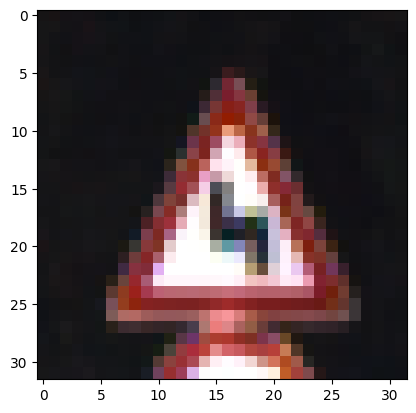

In [ ]:
plt.imshow(testX[80])